# Analytical report

In [1]:
# Set up database connection

import psycopg2 as pg
con = pg.connect(dbname='DBS2017_new', user='postgres')
cur = con.cursor()

In [2]:
# Import libraries

from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Useful functions

def analyze(data):
    print('Average:           ', np.mean(data))
    print('Standard deviation:', np.std(data))
    print('1st quartile:      ', np.percentile(data, 25))
    print('2nd quartile:      ', np.percentile(data, 50), '(median)')
    print('3st quartile:      ', np.percentile(data, 75))

## Account

**245200** rows

### Columns

* **id**: *primary key*
* **username**: varchar(30) *unique name identifier*
* **created**: timestamp *time when account was created*

In [4]:
# Examples of usernames

cur.execute('select username from account limit 20')
for row in cur.fetchall():
    print(row[0])

wel12
marmitch12
jamonte2083
jamonte012
kri285
stephacunnin0886
raymondmor492
mguzman8531
ronaldwhite481
erinmccann729
joswillia758
kelltor434
danied4257
melanke32
rebeccat3880
rebeccat821
styou71
stbr16
katwyatt3846
wel83


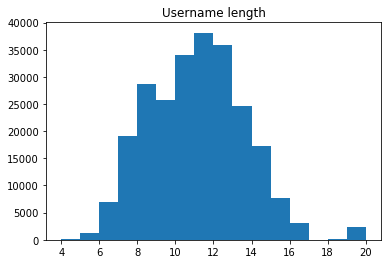

Average:            10.6435644372
Standard deviation: 2.52909033021
1st quartile:       9.0
2nd quartile:       11.0 (median)
3st quartile:       12.0


In [5]:
# Distribution of username lengths

cur.execute('select length(username) from account')
name_lengths = [row[0] for row in cur.fetchall()]
plt.hist(name_lengths, len(set(name_lengths)))
plt.title('Username length')
plt.show()

analyze(name_lengths)

## Tea

**1500000** rows

### Columns

* **id**: *primary key*
* **name**: text *descriptive title*
* **variety_id**: *references variety*
* **origin_id**: *references origin*
* **vendor_id**: *references vendor*

In [6]:
# Examples of tea names with their corresponding varieties

cur.execute(
    'select tea.name, variety.name from tea '
    'join variety on tea.variety_id = variety.id limit 20'
)
for row in cur.fetchall():
    print('{:40} {}'.format(*row))

Light roast Pichifan 1980 2006           Pichifan
GABA Juejiongbozui Silver Needle Brick   Juejiongbozui
Roasted Wuqizhennian Cake Maofeng        Wuqizhennian
High mountain Xiqiaochou BIO 1990        Xiqiaochou
Winter Wanbanliao 1986 Loose Leaf        Wanbanliao
Light roast Jiyuanwukun 1985 1987        Jiyuanwukun
Spring Zuiniaozhong 1987 1983            Zuiniaozhong
Classic Shiliexuekai BIO 2011            Shiliexuekai
Certified Organic Guigong 2003 2014      Guigong
Winter Ququlingzeng 2006 1999            Ququlingzeng
Summer Miaoxiongte 2009 2006             Miaoxiongte
Roasted Louwoyin 2007 Maofeng            Louwoyin
Summer Yubiankaiben 2004 2012            Yubiankaiben
Certified Organic Lieyuzai OP Organic    Lieyuzai
GABA Yinshuyanchen 1993 1983             Yinshuyanchen
Aged Huanhuoti 2001 2005                 Huanhuoti
Autumn Zhituan Special Grade Superior    Zhituan
Light roast Yizhunai 2009 1981           Yizhunai
Fresh Chebanleinuo 1990 2016             Chebanleinuo
Late Zi

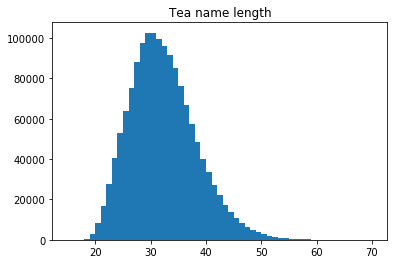

Average:            31.7886506667
Standard deviation: 5.98718081621
1st quartile:       27.0
2nd quartile:       31.0 (median)
3st quartile:       35.0


In [7]:
# Distribution of name lengths of teas

cur.execute('select length(name) from tea')
name_lengths = [row[0] for row in cur.fetchall()]
plt.hist(name_lengths, len(set(name_lengths)))
plt.title('Tea name length')
plt.show()

analyze(name_lengths)

In [8]:
# Examples of tea origins and vendors

cur.execute(
    'select origin.name, origin_country.name, vendor.name, vendor_country.name from tea '
    'join origin on tea.origin_id = origin.id '
    'join country as origin_country on origin.country_id = origin_country.id '
    'join vendor on tea.vendor_id = vendor.id '
    'join country as vendor_country on vendor.country_id = vendor_country.id limit 20'
)
for row in cur.fetchall():
    print('From {:10} in {:15} by {:30} in {}'.format(*row))

From Lienchiang in Taiwan          by Barnes, Hanson and Lynch       in Ireland {Republic}
From Hubei      in China           by White, Richardson and Roberts  in Panama
From Pingtung   in Taiwan          by Coleman, Patel and Hargreaves  in United States
From Yamaguchi  in Japan           by Peacock-Jackson                in Mexico
From Niigata    in Japan           by Evans, Leach and Smith         in Greece
From Shaanxi    in China           by Richards-Hopkins               in Bulgaria
From Jharkhand  in India           by Little, Thompson and Smith     in Sudan
From Yilan      in Taiwan          by King-Green                     in Poland
From Tripura    in India           by Clarke-Edwards                 in Zambia
From Jiangxi    in China           by King LLC                       in Andorra
From Akita      in Japan           by Thompson, Reid and Ryan        in Morocco
From Gifu       in Japan           by Bird Group                     in Switzerland
From Haryana    in India 

## Purchase

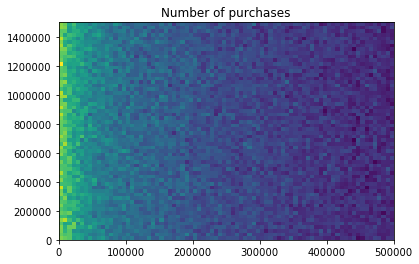

In [9]:
# 2D histogram of purchases

cur.execute('select account_id, tea_id from purchase')
purchases = cur.fetchall()
purchased_by = [row[0] for row in purchases]
purchased_teas = [row[1] for row in purchases]
plt.hist2d(purchased_by, purchased_teas, (80, 60))
plt.title('Number of purchases')
plt.show()

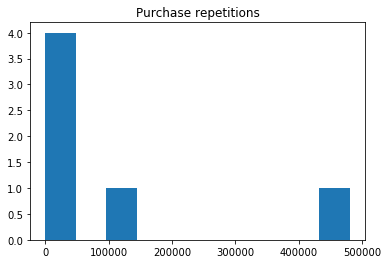

In [10]:
# Number of repetitions of the same purchase

purchase_num = {i: 0 for i in set(purchases)}
for i in purchases:
    purchase_num[i] += 1
purchase_num = list(purchase_num.values())
purchase_num = [purchase_num.count(num) for num in set(purchase_num)]
plt.hist(purchase_num)
plt.title('Purchase repetitions')
plt.show()

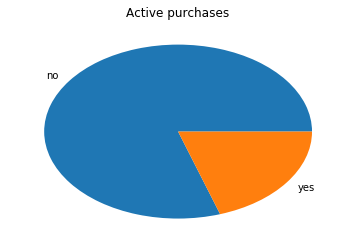

Average:            0.800804695005
Standard deviation: 0.399395212118
1st quartile:       1.0
2nd quartile:       1.0 (median)
3st quartile:       1.0


In [11]:
# Has the tea run out?

cur.execute('select active from purchase')
active = [row[0] for row in cur.fetchall()]
plt.pie((active.count(1), active.count(0)), labels=('no', 'yes'))
plt.title('Active purchases')
plt.show()

analyze(active)

## Rating

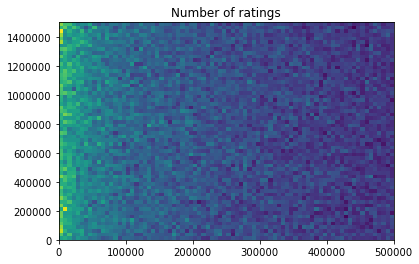

In [12]:
# 2D histogram of ratings

cur.execute('select account_id, tea_id from rating')
ratings = cur.fetchall()
rated_by = [row[0] for row in ratings]
rated_teas = [row[1] for row in ratings]
plt.hist2d(rated_by, rated_teas, (80, 60))
plt.title('Number of ratings')
plt.show()

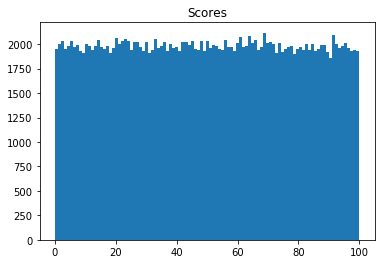

Average:            49.92614
Standard deviation: 29.1070897669
1st quartile:       25.0
2nd quartile:       50.0 (median)
3st quartile:       75.0


In [13]:
# Distribution of scores in ratings

cur.execute('select score from rating')
scores = [row[0] for row in cur.fetchall()]
plt.hist(scores, len(set(scores)))
plt.title('Scores')
plt.show()

analyze(scores)

## Origin

**116** rows

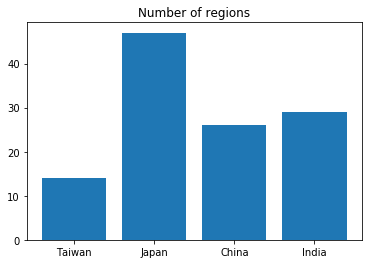

In [14]:
# Numbers of regions in countries

cur.execute('select country.name from origin '
    'join country on origin.country_id = country.id'
)
region_countries = [row[0] for row in cur.fetchall()]
country_regions = {i: region_countries.count(i) for i in set(region_countries)}
plt.bar(range(len(country_regions)), country_regions.values(), tick_label=country_regions.keys())
plt.title('Number of regions')
plt.show()

## Vendor

**34019** rows

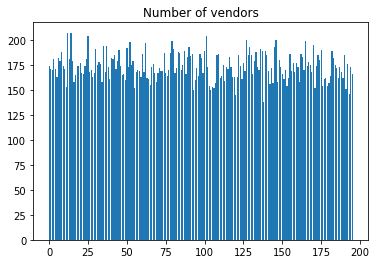

In [15]:
# Numbers of vendors in all countries

cur.execute('select country.name from vendor '
    'join country on vendor.country_id = country.id'
)
vendor_countries = [row[0] for row in cur.fetchall()]
country_vendors = {i: vendor_countries.count(i) for i in set(vendor_countries)}
plt.bar(range(len(country_vendors)), country_vendors.values())
plt.title('Number of vendors')
plt.show()

In [16]:
# Examples of vendor names

cur.execute('select name from vendor limit 20')
for row in cur.fetchall():
    print(row[0])

Griffiths Inc
Burgess-Winter
Knight, Thomas and Fox
Rowe-Greenwood
White, Preston and Clements
Carter-Khan
Hamilton, Knowles and Morris
Howells Group
Hill LLC
Cox-Griffiths
Ward, Miah and Joyce
Walker, Jones and Armstrong
Martin Inc
Roberts Group
Griffiths-Yates
Walker, Stone and Fowler
Harris, Wright and Reynolds
Stokes-Quinn
Lloyd-Baker
Foster, Hall and Richardson


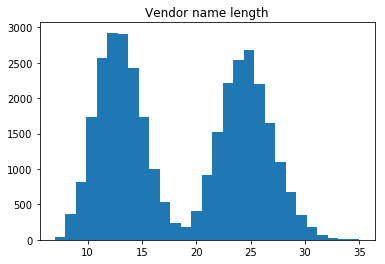

Average:            18.6143037714
Standard deviation: 6.53220878441
1st quartile:       13.0
2nd quartile:       17.0 (median)
3st quartile:       25.0


In [17]:
# Distribution of lengths of vendor names

cur.execute('select length(name) from vendor')
name_lengths = [row[0] for row in cur.fetchall()]
plt.hist(name_lengths, len(set(name_lengths)))
plt.title('Vendor name length')
plt.show()

analyze(name_lengths)

## Variety

**175216** rows

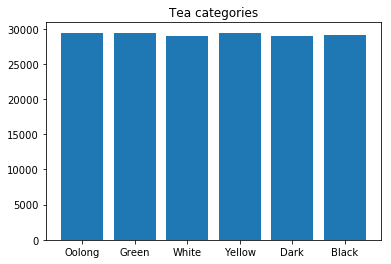

In [18]:
# Numbers of varieties in categories

cur.execute('select category.name from variety '
    'join category on variety.category_id = category.id'
)
variety_categories = [row[0] for row in cur.fetchall()]
category_varieties = {i: variety_categories.count(i) for i in set(variety_categories)}
plt.bar(range(len(category_varieties)), category_varieties.values(), tick_label=category_varieties.keys())
plt.title('Tea categories')
plt.show()

In [19]:
# Examples of variety names

cur.execute('select name from variety limit 20')
for row in cur.fetchall():
    print(row[0])

Chengqie
Wujiebi
Yehuiaoran
Diaohuiqikan
Xueyunpanger
Tehanjizhu
Babiqunyang
Aizhe
Duibianli
Jizhuijiu
Peihou
Yumoyun
Weicang
Xichuha
Shanduolou
Yufuhengxuan
Xixin
Xuanzhifuba
Fukuaixianchou
Chouxuankeng


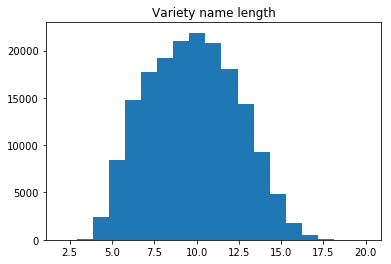

Average:            9.69434298238
Standard deviation: 2.79423055016
1st quartile:       8.0
2nd quartile:       10.0 (median)
3st quartile:       12.0


In [20]:
# Distribution of lengths of variety names

cur.execute('select length(name) from variety')
name_lengths = [row[0] for row in cur.fetchall()]
plt.hist(name_lengths, len(set(name_lengths)))
plt.title('Variety name length')
plt.show()

analyze(name_lengths)

## Flavor

**481** rows

In [21]:
# Examples of flavor descriptions

cur.execute('select name from flavor limit 20')
for row in cur.fetchall():
    print(row[0])

Banana
Amylacetate
Brown
Candy-like
Cooked
Creamy
Diffusive
Estery
Floral, Geranium
Fresh, Sulfidic
Green
Mashed
Peely
Pulpy
Ripe
Rotten
Starchy
Astringent
Earthy
Fermented


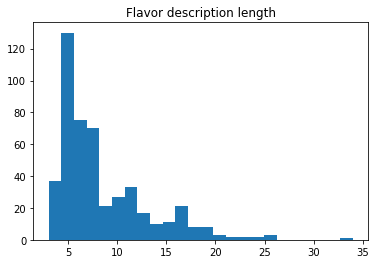

Average:            8.50727650728
Standard deviation: 4.69002225995
1st quartile:       5.0
2nd quartile:       6.0 (median)
3st quartile:       11.0


In [22]:
# Distribution of lengths of flavor descriptions

cur.execute('select length(name) from flavor')
name_lengths = [row[0] for row in cur.fetchall()]
plt.hist(name_lengths, len(set(name_lengths)))
plt.title('Flavor description length')
plt.show()

analyze(name_lengths)

In [23]:
con.close()